In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [12]:
with open('../../Datasets/normalized_banknote.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)
X = temp[:,:-1]
y = temp[:,-1]
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder()
y = drop_enc.fit_transform(y.reshape(-1, 1)).toarray()

feats_train, feats_test, Y_train, Y_test = train_test_split(X, y,train_size=0.7,random_state=42)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 24)                120       
                                                                 
 dense_9 (Dense)             (None, 50)                1250      
                                                                 
 dense_10 (Dense)            (None, 24)                1224      
                                                                 
 dense_11 (Dense)            (None, 2)                 50        
                                                                 
Total params: 2,644
Trainable params: 2,644
Non-trainable params: 0
_________________________________________________________________
None


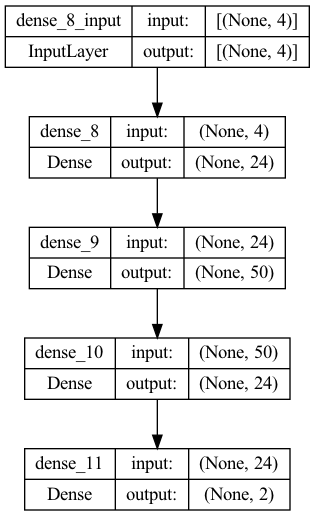

In [13]:
# Create the model
model = Sequential()
model.add(Dense(24, input_dim = 4, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(feats_train, Y_train, epochs=50, batch_size=40, verbose=1)

Epoch 1/50
 6/24 [======>.......................] - ETA: 0s - loss: 0.6917 - accuracy: 0.4458

2022-12-11 16:55:56.846723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 16ms/step - loss: 0.6631 - accuracy: 0.5975
Epoch 2/50
24/24 [==============================] - 0s 9ms/step - loss: 0.5971 - accuracy: 0.7852
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 0.5393 - accuracy: 0.8352
Epoch 4/50
24/24 [==============================] - 0s 9ms/step - loss: 0.4825 - accuracy: 0.8592
Epoch 5/50
24/24 [==============================] - 0s 9ms/step - loss: 0.4281 - accuracy: 0.8790
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.3779 - accuracy: 0.8999
Epoch 7/50
24/24 [==============================] - 0s 12ms/step - loss: 0.3321 - accuracy: 0.9176
Epoch 8/50
24/24 [==============================] - 0s 11ms/step - loss: 0.2907 - accuracy: 0.9353
Epoch 9/50
24/24 [==============================] - 0s 11ms/step - loss: 0.2536 - accuracy: 0.9468
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 0.2206 - accuracy: 0.9593
Epoch 11/50
24/24 [=====

In [15]:
test_results = model.evaluate(feats_test,Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

13/13 [==============================] - 0s 10ms/step - loss: 0.0198 - accuracy: 1.0000
Test results - Loss: 0.01981508545577526 - Accuracy: 1.0%


2022-12-11 16:56:09.213893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 3ms/step


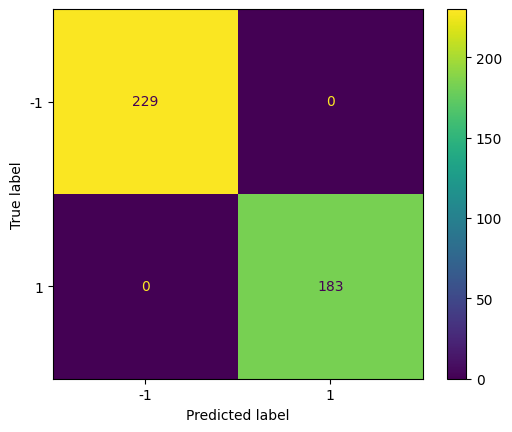

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

predictions_test = model.predict(feats_test)

binary_predictions_test = []
binay_y_test = []
for item in predictions_test:
    binary_predictions_test.append(int(item[0]<item[1]))
    binay_y_test.append(int(item[0]<item[1]))


cm = confusion_matrix(binay_y_test, binary_predictions_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1,1])
disp.plot()
disp.im_.set_clim(0, 230)
plt.show()